## Sampling Distribution
`A sampling distribution is a probability distribution of a statistic obtained from a larger number of samples drawn from a specific population. The sampling distribution of a given population is the distribution of frequencies of a range of different outcomes that could possibly occur for a statistic of a population.` - <a href='https://www.investopedia.com/terms/s/sampling-distribution.asp'>Investopedia</a>

Relevant notations and definitions related to a Sampling Distribution
- $\mu$: mean of the population
- M: mean of the sample
- $\sigma$: standard deviation (measure for the spread of a distribution around the mean)
- sd = standard error (standard deviation of the sampling distribution) 
- n = number to create the sampling distribution (sample size), which is k in random.choices()
- z-score: numerical measurement (in standard deviations) of a value's relationship to the mean of a group of values

<a href='https://s3.amazonaws.com/udacity-hosted-downloads/ZTable.jpg'>Link to z-table</a>

In [40]:
# relevant imports
import numpy as np
import pandas as pd
import math # for squre root calculations
import random
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
# read data 
df = pd.read_excel('data/Klout scores (Lesson 7).xlsx', header=None)
# transfrom to numpy array
arr = df.to_numpy()
# reshape array
arr = np.reshape(arr, (arr.shape[0]))

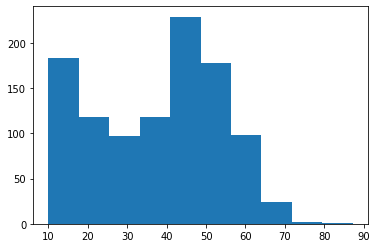

In [3]:
plt.hist(arr);

In [4]:
# calculate mean and std of population
mean_pop = round(arr.mean(), 2)
std_pop = round(arr.std(), 2)

print(f'Mean of the population: {mean_pop}')
print(f'Standard deviation of the population: {std_pop}')


Mean of the population: 37.72
Standard deviation of the population: 16.04


> bimodal distribution with a mean $\mu$ of 37.72 and a standard deviation $\sigma$ of 16.04

We can sample the data to get an estimate of the mean through the sampled data

In [14]:
sampled_means = []
n = 35
draws = 100

for i in range(1, draws, 1):
    sm = random.choices(arr, k=n)
    sm = np.mean(sm)
    sampled_means.append(sm)

In [15]:
sampled_mean = round(np.mean(sampled_means), 2)
print(sampled_mean)

37.6


> over 100 draws we calculated the mean for each draw and added it to a list were we finally calculate the mean of the sampled distribution which is with 37.43 relatively close to the real population mean.

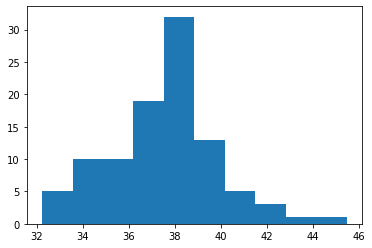

In [16]:
# plot the sampled means
plt.hist(sampled_means);

In [8]:
# check what happens if we increase the draws from the population to 1000
sampled_means = []
n = 35
draws = 1000

for i in range(1, draws, 1):
    sm = random.choices(arr, k=n)
    sm = np.mean(sm)
    sampled_means.append(sm)

In [25]:
sampled_mean = round(np.mean(sampled_means), 2)
sampled_std = round(np.std(sampled_means), 2)
print(f'estimated mean: {sampled_mean}')
print(f'estimated std: {sampled_std}')

estimated mean: 37.6
estimated std: 2.38


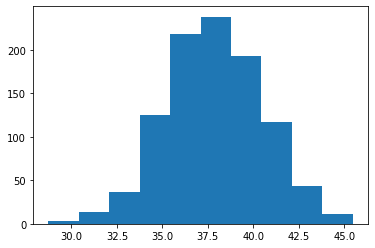

In [10]:
# plot the sampled means
plt.hist(sampled_means);

> the increase in draws has resulted in a better prediction of the mean through the sample. Lets try to also increase the size of the sample n.

In [11]:
sampled_means = []
n = 100
draws = 1000

for i in range(1, draws, 1):
    sm = random.choices(arr, k=n)
    sm = np.mean(sm)
    sampled_means.append(sm)

In [12]:
sampled_mean = round(np.mean(sampled_means), 2)
print(sampled_mean)

37.81


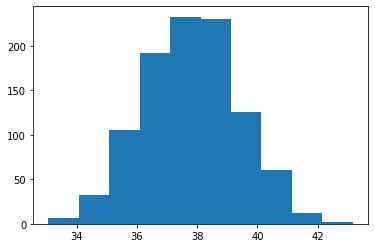

In [13]:
# plot the sampled means
plt.hist(sampled_means);

> as expected the estimation of the mean for the population increased. So you can influence the accuracy of the sampled mean to the population mean by tuning these parameters.

If we would sample the population a lot we would get the exact same mean. So in further calculation we can take the real mean of the population.

### Calculate the z-score for a value in the sampling distribution
- z-score: $(x-\mu)\div\sigma$

we can't use this exact formula since we want to get the z score related to the sampling distribution. Therefore we need the standard error, which is the standard deviation in the sampling distribution.

- standard error: $\sigma\div\sqrt{n}$

In [43]:
# calculate standard error
standard_error_35 = std_pop / math.sqrt(35)
standard_error_35

2.711254849169081

In [45]:
z = (40 - mean_pop) / standard_error_35
z

0.840939021537851

> 40 is 0.84 units of standard deviations 'away' from the mean

### Calculate the probability that an individual as a score of 40 and above
- since we know the z-score, we can use the z-table to look up the probability

In [34]:
z_prob = 0.7995
# substract from 1 since we want the porbability to the right of the score and th etable showed probs to the left
prob = 1- z_prob
print(f'probability that an individual has a sore of 40 and more: {prob}')

probability that an individual has a sore of 40 and more: 0.2005


> so the chance is 20 % that an individual has a score of 40 or higher in the sampling distribution

### Check the same in a sampling dist with a higher size

If we would increase the sample size we would effectively decrease the range of the sampling distribution and therefor reduce the probability that an individual as a score of 40 or higher in that distribution.

In [47]:
standard_error_250 = std_pop / math.sqrt(250)
standard_error_250

1.014458673382016

In [48]:
z = (40 - mean_pop) / standard_error_250
z

2.247504072688251

In [39]:
z_prob = 0.9875
prob = 1 - 0.9875
print(f'probability that an individual has a sore of 40 and more: {round(prob, 4)}')

probability that an individual has a sore of 40 and more: 0.0125


> as expected the probability reduced from 20% to 1%

### Plot the different sample distributions

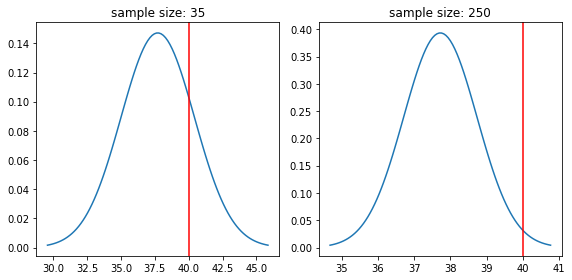

In [60]:
mu = mean_pop
sigma1 = standard_error_35
sigma2 = standard_error_250
x1 = np.linspace(mu - 3*sigma1, mu + 3*sigma1, 100)
x2 = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].set_title('sample size: 35')
axes[0].plot(x1, stats.norm.pdf(x1, mu, sigma1))
axes[0].axvline(x=40, c='r')
axes[1].set_title('sample size: 250')
axes[1].plot(x2, stats.norm.pdf(x2, mu, sigma2))
axes[1].axvline(x=40, c='r')
fig.tight_layout()

> you can clearly see the difference between the two sampling distributions. The one on the left with a sampling size of 35 has a bigger range than the one on the right with a sampling size of 250. `As the sample sizes increase, the variability of each sampling distribution decreases so that they become increasingly more leptokurtic` - <a href='http://www.psychology.emory.edu/clinical/bliwise/Tutorials/CLT/CLT/fsummary.htm'>Link</a>

### Confidence Intervals
to calculate CIs we need to the so called critical values for the respected size of the CI
- 95% CI: +/- 1.96
- 98% CI: +/- 2.33

formula:
- lower = x - (critical value * standard error)
- upper = x + (critical value * standard error)    

In [64]:
lower_35 = mean_pop - (1.96 * standard_error_35)
upper_35 = mean_pop + (1.96 * standard_error_35)

print(lower_35)
print(upper_35)

32.4059404956286
43.0340595043714


In [65]:
lower_250 = mean_pop - (1.96 * standard_error_250)
upper_250 = mean_pop + (1.96 * standard_error_250)

print(lower)
print(upper)

35.73166100017125
39.70833899982875


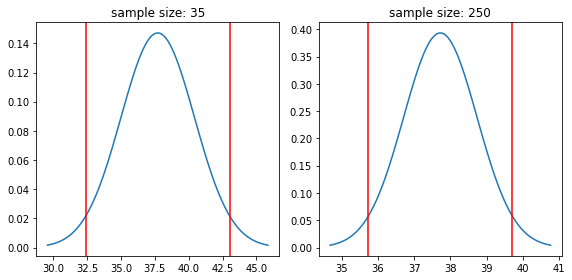

In [66]:
mu = mean_pop
sigma1 = standard_error_35
sigma2 = standard_error_250
x1 = np.linspace(mu - 3*sigma1, mu + 3*sigma1, 100)
x2 = np.linspace(mu - 3*sigma2, mu + 3*sigma2, 100)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

axes[0].set_title('sample size: 35')
axes[0].plot(x1, stats.norm.pdf(x1, mu, sigma1))
axes[0].axvline(x=lower_35, c='r')
axes[0].axvline(x=upper_35, c='r')
axes[1].set_title('sample size: 250')
axes[1].plot(x2, stats.norm.pdf(x2, mu, sigma2))
axes[1].axvline(x=lower_250, c='r')
axes[1].axvline(x=upper_250, c='r')
fig.tight_layout()

> the range of the 95% CI for the sample size of 35 is broader than for the sample size of 250

## Resources
- Udacity statistics intro
- https://stackoverflow.com/questions/10138085/python-plot-normal-distribution
- https://stackoverflow.com/questions/42818361/how-to-make-two-plots-side-by-side-using-python